In [1]:
from collections import defaultdict
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import os
import string
import numpy as np

def get_freq_words_hastag(n = 30, filename = "Twitter-Get-Old-Tweets-Scraper/wedding/tweets_gathered_wedding_#harryandmeghan.csv"):
    '''
    print out most frequent words given a hashtag
    Input:
        n: number of frequent words desired (i.e: 30)
        filename: csvfile of certain hashtag
        (i.e: "tweets_gathered_wedding_#harryandmeghan.csv")
        
    Return: 
        maxkey: most frequent words
        maxperctg: percentage of these words
    '''

    #filename = "Twitter-Get-Old-Tweets-Scraper/tweets_gathered_wedding_#harryandmeghan.csv"
    word_dict = defaultdict(int)
    stop_words = set(stopwords.words('english'))
    punctuations = string.punctuation
    #f = open('filename')
    tweet_ids = [] 
    lines = []
    import csv

    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        sublines=[]
        for i,row in enumerate(csv_reader):
            if i >0 and (row[9] not in tweet_ids):
                tweet_ids.append(row[9])
                sublines.append(row[5])
                lines.append(row[5])
        print("finished file {} >> {} lines ({})".format(filename,len(lines), len(sublines)))
    i=0
    for line in lines:
        subline=line.lower().split()
        for s in subline:
            if (s not in stop_words) and (s not in punctuations) and (not s.startswith('#')) and (not s.startswith(".")) :
                word_dict[s] += 1
        i+=1

    #sorted(word_dict.items(), key=lambda word_dict : word_dict[1])
    #print(word_dict)

    maxkey = sorted(word_dict, key=word_dict.get, reverse=True)[:n]

    maxvalues = [word_dict[s] for s in maxkey]
    result_dict={}
    for i in range(len(maxkey)):
        #print("{:20}   {:10}    {:.2f}%".format(maxkey[i], maxvalues[i], 100*maxvalues[i]/len(lines)))
        result_dict[maxkey[i]] =maxvalues[i]/len(lines)
    #maxperctg = 100*np.array(maxvalues)/len(lines)
    return result_dict




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yayulin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Plot heatmap for hashtags text relevance

In [2]:
def get_corr_df(directory, hashtags, n=30):
    '''
    Analyze the relevance between tweets' texts from popular hashtags of each events
    Input:
        directory: filepath of csvfile of certain hashtag
        hashtags: a list of hashtags names
        n: number of frequent words desired (i.e: 30)
    Output:
        corr_df: a dataframe contains correlation values between hashtags
    '''
    assert isinstance(directory,list)
    assert isinstance(hashtags,list)
    assert isinstance(n,int) and n>0
    
    corr_list = []
    N = len(directory)
    corr_matr = np.zeros((N, N))
    n = 30
    dict_set = []
    for i in range(N):
        dict_set = dict_set + [get_freq_words_hastag(n, "./Project_dataset/"+directory[i])]
    
    for i in range(N):
        for j in range(N-i):
            dict_1 = dict_set[i]
            dict_2 = dict_set[j+i]
            temp = {x:dict_1[x]*dict_2[x] for x in dict_1 if x in dict_2}
            corr_list = corr_list + [[i, j+i, sum(temp.values())]]
            corr_matr[i, j+i] = sum(temp.values())
            corr_matr[j+i, i] = sum(temp.values())
    corr_matr = corr_matr/corr_matr.max()
    corr_df = pd.DataFrame(corr_matr,index = hashtags)
    corr_df.columns = hashtags
    return corr_df

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

def plot_corr(corr_df,title):
    '''
    Plot the relevance between tweets' texts from popular hashtags of each events
    Input:
        corr_df: a dataframe contains correlation values between hashtags
        title: event name, string
    Output:
        A heatmap presents the correlation between hashtags
    '''
    
    assert isinstance(corr_df,pd.DataFrame)
    assert isinstance(title,str)
    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(20, 10, as_cmap=True)
    mask = np.zeros_like(corr_df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(corr_df, mask=mask, annot=True, cmap ='YlOrRd', vmax = 1,
                square=True, linewidths=.5, cbar_kws={"shrink": .7}, annot_kws={"size": 14})
    plt.yticks(rotation=0, fontsize=18) 
    plt.xticks(rotation=45, fontsize=18) 
    plt.title(title+" Hashtag Relevance", fontsize=18)

    return sns.heatmap

### Plot parkland hashtag relevance

finished file ./Project_dataset/Shooting/guncontrolnow--2018-01-29--2018-08-14.csv >> 4147 lines (4147)
finished file ./Project_dataset/Shooting/gunreformnow--2018-01-29--2018-08-14.csv >> 3828 lines (3828)
finished file ./Project_dataset/Shooting/marchforourlives--2018-01-29--2018-08-14.csv >> 500 lines (500)
finished file ./Project_dataset/Shooting/neveragain--2018-01-29--2018-08-14.csv >> 10120 lines (10120)
finished file ./Project_dataset/Shooting/parkland--2018-01-29--2018-08-14.csv >> 2945 lines (2945)


<function seaborn.matrix.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

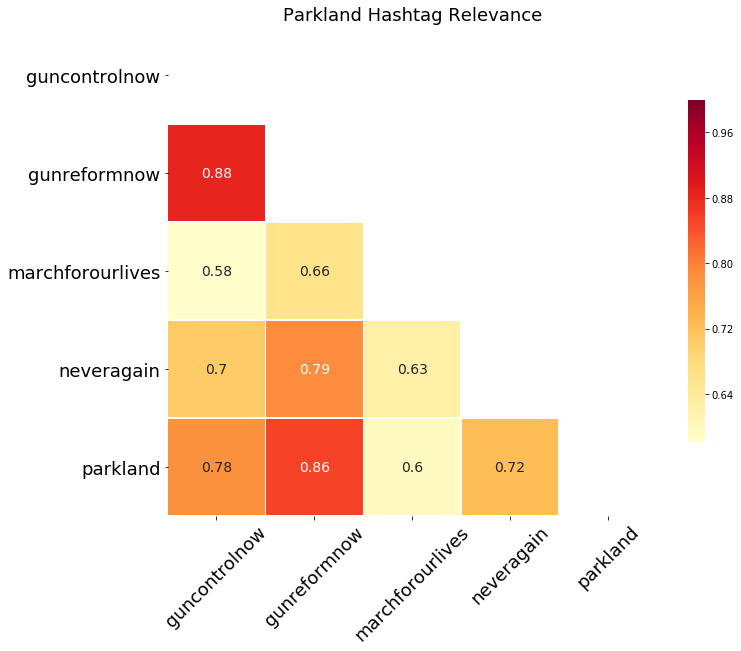

In [4]:
directory = ["Shooting/guncontrolnow--2018-01-29--2018-08-14.csv",
             "Shooting/gunreformnow--2018-01-29--2018-08-14.csv",
             "Shooting/marchforourlives--2018-01-29--2018-08-14.csv",
             "Shooting/neveragain--2018-01-29--2018-08-14.csv",
             "Shooting/parkland--2018-01-29--2018-08-14.csv"]
hashtags = ["guncontrolnow", "gunreformnow", "marchforourlives", "neveragain", "parkland"]
corr_df = get_corr_df(directory, hashtags, n=30)
plot_corr(corr_df,"Parkland")

### Plot MeToo hashtag relevance

finished file ./Project_dataset/MeToo/believesurvivors--2017-09-30--2018-10-15.csv >> 2102 lines (2102)
finished file ./Project_dataset/MeToo/kavanaugh--2017-09-30--2018-10-15.csv >> 11296 lines (11296)
finished file ./Project_dataset/MeToo/maga--2017-09-30--2018-04-09.csv >> 46801 lines (46801)
finished file ./Project_dataset/MeToo/MeToo--2017-09-30--2018-10-15.csv >> 48829 lines (48829)
finished file ./Project_dataset/MeToo/resist--2017-09-30--2018-10-15.csv >> 29592 lines (29592)
finished file ./Project_dataset/MeToo/stopkavanaugh--2017-09-30--2018-10-15.csv >> 6021 lines (6021)
finished file ./Project_dataset/MeToo/timesup--2017-09-30--2018-10-15.csv >> 6706 lines (6706)
finished file ./Project_dataset/MeToo/trump--2017-09-30--2018-04-11.csv >> 31700 lines (31700)


<function seaborn.matrix.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

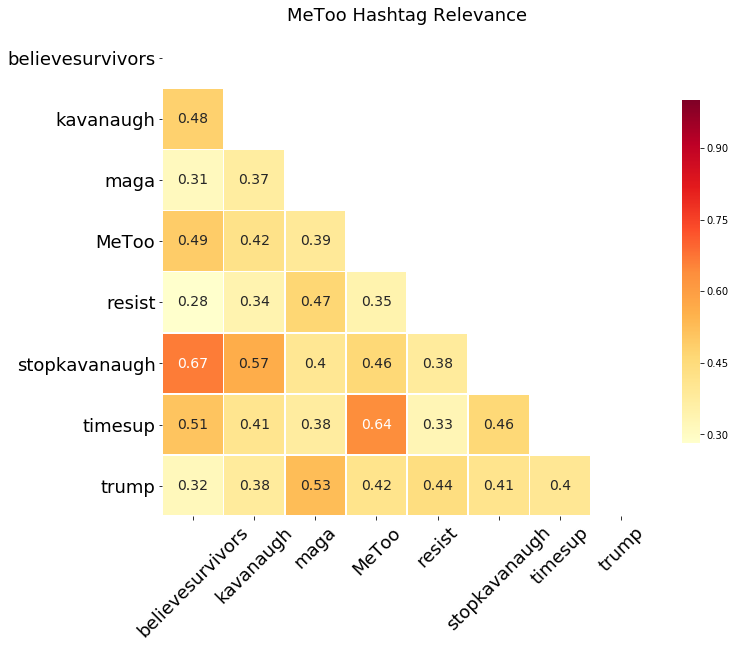

In [5]:
directory = ["MeToo/believesurvivors--2017-09-30--2018-10-15.csv",
             "MeToo/kavanaugh--2017-09-30--2018-10-15.csv",
             "MeToo/maga--2017-09-30--2018-04-09.csv",
             "MeToo/MeToo--2017-09-30--2018-10-15.csv",
            "MeToo/resist--2017-09-30--2018-10-15.csv",
            "MeToo/stopkavanaugh--2017-09-30--2018-10-15.csv",
            "MeToo/timesup--2017-09-30--2018-10-15.csv",
            "MeToo/trump--2017-09-30--2018-04-11.csv"]
hashtags = ["believesurvivors", "kavanaugh", "maga", "MeToo", "resist", "stopkavanaugh",
           "timesup", "trump"]
corr_df = get_corr_df(directory, hashtags, n=30)
plot_corr(corr_df,"MeToo")